In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os

In [2]:
x = input('Laptop ? [y/n]')
if x == 'n':
    path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df=pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')
else:
    path = 'C:\\Users\\Nico Janko\\Documents\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df = pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')

Laptop ? [y/n] n


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
df['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [5]:
df['product_category_0'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0])
print(df['product_category_0'].unique().shape[0])
df['product_category_1'] = df['product_category_tree'].apply(lambda x: x.split('>>')[1])
print(df['product_category_1'].unique().shape[0])

7
63


# Text

In [6]:
txt_df = df.iloc[:, [0, 10, 15, 16]]

<AxesSubplot:>

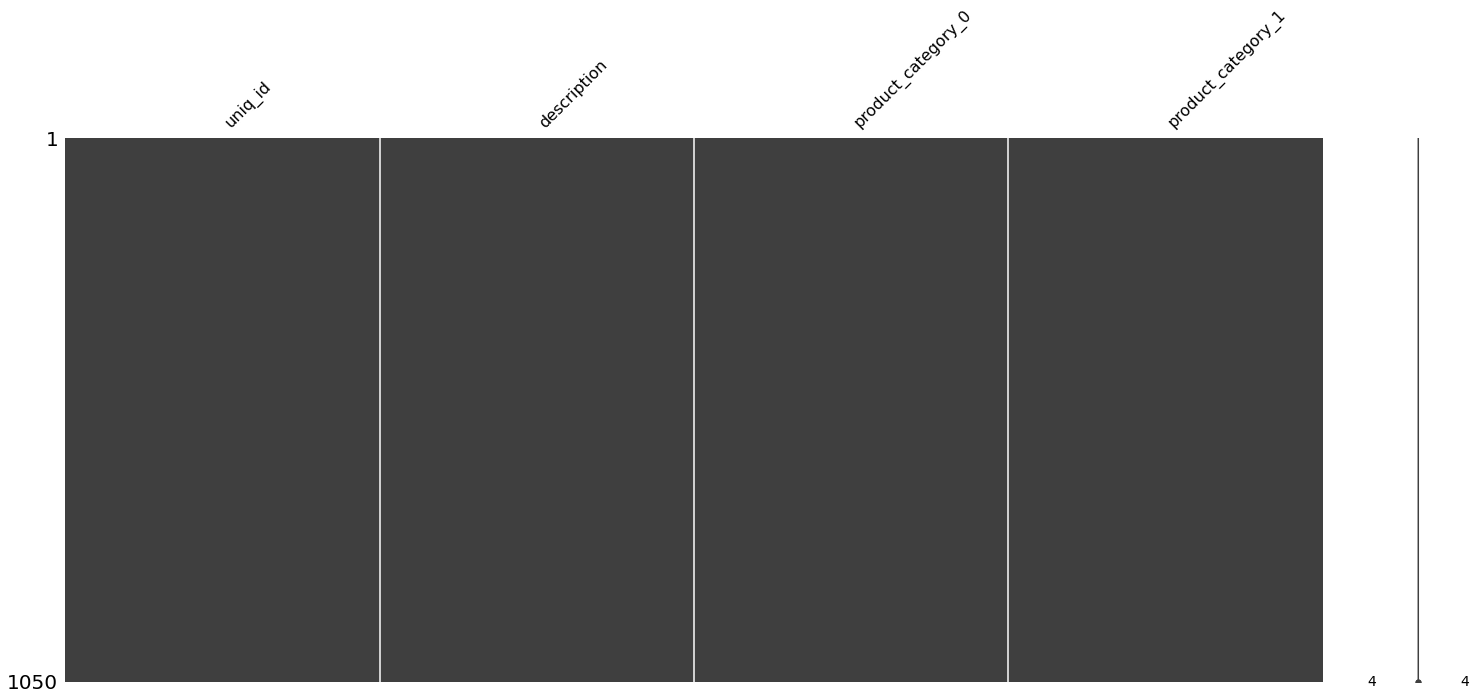

In [7]:
msno.matrix(txt_df)

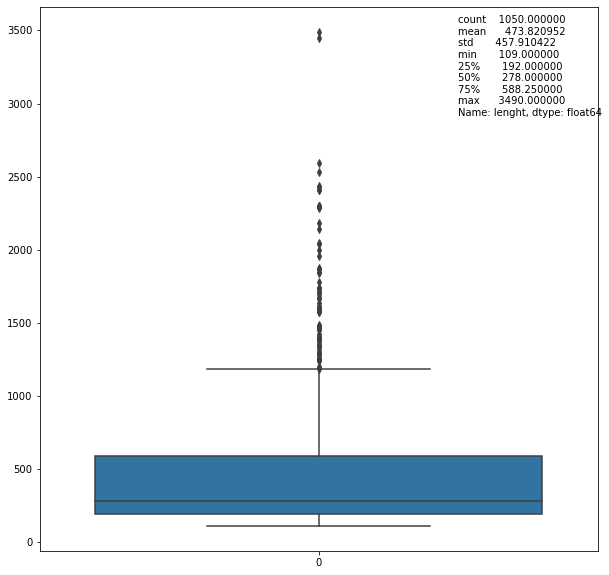

In [8]:
txt_df['lenght'] = txt_df['description'].apply(lambda x: len(x))
txt_df['lenght'].describe()
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [9]:
out = []
q1 = txt_df['lenght'].quantile(0.25)
q3 = txt_df['lenght'].quantile(0.75)
interq = q3-q1
out = txt_df.loc[(txt_df['lenght'] < (q1-1.5*interq)) | (txt_df['lenght'] > (q3+1.5*interq))]
print(out.shape[0], out.shape[0]/txt_df.shape[0]*100)
out.sort_values(by='lenght', ascending = False).iloc[1, 1]

85 8.095238095238095


'Key Features of Sunlast 16 inch Laptop Backpack Laptop Backpack with solar panel Comfortable back panel with air-flow design Adjustable sternum strap Large outer elasticated mesh side pocket and a top carry handle Padded and Adjustable shoulder straps Charge your mobile by solar power Mobile power backup option Long life Easy to use,Sunlast 16 inch Laptop Backpack (Yellow) Price: Rs. 2,348 The Sunlast New Laptop Backpack with Solar Panel ensures complete safety to your laptop with its high-quality built and wide range of built-in features. With the inside of this bag featuring a protective padding, you can be rest assured that the laptop inside it will be well cushioned from any accidental damage caused when you bump into any surface. As it is made of nylon, this laptop backpack can withstand abrasions and is long lasting. This Sunlast Backpack comes with a unique solar panel which allows you to charge your mobile phone anywhere anytime. This Sunlast Laptop backpack with solar panel i

## Preprocessing

In [10]:
import nltk 
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
words = set(nltk.corpus.words.words())
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

def prepro(x):
    prepro_list = []
    for sentence in x:
        sent_wo_punc = "".join([i.lower() for i in sentence if i not in string.punctuation])
        sent_wo_num = ''.join([i for i in sent_wo_punc if not i.isdigit()])
        sent_token = nltk.tokenize.word_tokenize(sent_wo_num)
        sent_token_wo_punc = [i for i in sent_token if i not in string.punctuation]
        token_wo_stop = [i for i in sent_token_wo_punc if i not in stopwords]
        lem = (lemmatizer.lemmatize(i) for i in token_wo_stop if i not in string.punctuation)
        clean = ' '.join(i for i in lem if len(str(i)) > 2)
        prepro_list.append(clean)
    return prepro_list

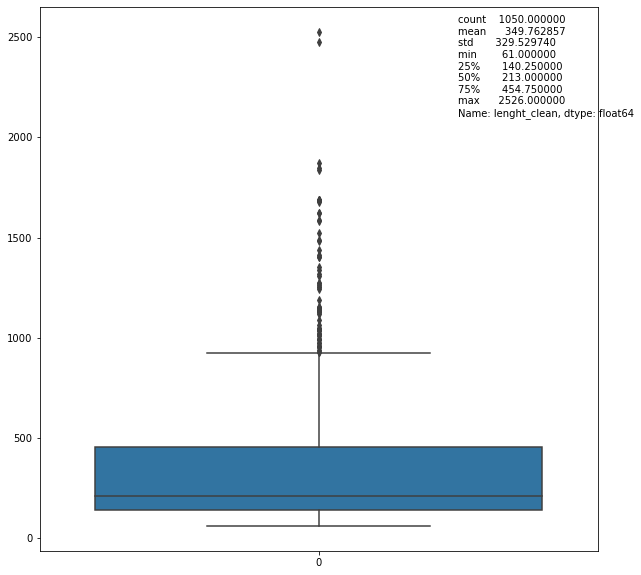

In [12]:
txt_df['description_clean'] = prepro(txt_df['description'])
txt_df['lenght_clean'] = txt_df['description_clean'].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght_clean'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght_clean'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
txt_df['labels_0'] = le.fit_transform(txt_df['product_category_0'])
txt_df['labels_1'] = le.fit_transform(txt_df['product_category_1'])

## Bag of Words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())

In [15]:
from sklearn import cluster, metrics
clus = cluster.KMeans(n_clusters = 7, random_state = 38)
clus1 = cluster.KMeans(n_clusters = 63, random_state = 38)
clus.fit(bag_of_words)
clus1.fit(bag_of_words)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.05050414138101717 for categorie 0 and 0.20227980288851183 for categorie 1.


## Tf-Idf

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
clus.fit(tf_idf_matrix)
clus1.fit(tf_idf_matrix)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.22941499576859406 for categorie 0 and 0.3284116487595218 for categorie 1.


### n-gram

In [17]:
# Bag of words
for i in range(1, 6):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(i, i))
    bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(bag_of_words)
    clus1.fit(bag_of_words)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))


The ari scores for the 1-gram are 0.05050414138101717 for categorie 0 and 0.20227980288851183 for categorie 1.
The ari scores for the 2-gram are 0.0864220409828023 for categorie 0 and 0.2391774800384327 for categorie 1.
The ari scores for the 3-gram are 0.10715253881645978 for categorie 0 and 0.31064696863747066 for categorie 1.
The ari scores for the 4-gram are 0.11318186844075573 for categorie 0 and 0.1478134071005019 for categorie 1.
The ari scores for the 5-gram are 0.11422656957446585 for categorie 0 and 0.1677678386324624 for categorie 1.


In [18]:
# tf-idf
for i in range(1,6):
    tf_idf_vect = TfidfVectorizer(stop_words='english', ngram_range=(i, i))
    tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(tf_idf_matrix)
    clus1.fit(tf_idf_matrix)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))

The ari scores for the 1-gram are 0.22941499576859406 for categorie 0 and 0.3284116487595218 for categorie 1.
The ari scores for the 2-gram are 0.1935501166120231 for categorie 0 and 0.2680018710272981 for categorie 1.
The ari scores for the 3-gram are 0.19242307186383648 for categorie 0 and 0.21453995039538673 for categorie 1.
The ari scores for the 4-gram are 0.1329379838703345 for categorie 0 and 0.1943446213342254 for categorie 1.
The ari scores for the 5-gram are 0.20302568360646106 for categorie 0 and 0.2305148402836616 for categorie 1.


In [19]:
txt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   uniq_id             1050 non-null   object
 1   description         1050 non-null   object
 2   product_category_0  1050 non-null   object
 3   product_category_1  1050 non-null   object
 4   lenght              1050 non-null   int64 
 5   description_clean   1050 non-null   object
 6   lenght_clean        1050 non-null   int64 
 7   labels_0            1050 non-null   int32 
 8   labels_1            1050 non-null   int32 
dtypes: int32(2), int64(2), object(5)
memory usage: 65.8+ KB


## Word2Vec

In [20]:
txt_df['description_token'] = txt_df['description_clean'].apply(lambda x: nltk.tokenize.word_tokenize(x))

In [22]:
from gensim.models import Word2Vec
model = Word2Vec(vector_size = 300)
model.build_vocab(txt_df['description_token'].tolist())
model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=35)

(1283774, 1828715)

In [23]:
model.corpus_count

1050

In [24]:
vector = model.wv

In [25]:
vector.most_similar("natural")

[('vibrantly', 0.8053683042526245),
 ('smooth', 0.7673658728599548),
 ('arabic', 0.7493201494216919),
 ('lip', 0.7449312806129456),
 ('oudh', 0.7327949404716492),
 ('bar', 0.7307482957839966),
 ('pencil', 0.7298482656478882),
 ('conditioner', 0.7209154963493347),
 ('bathing', 0.7162775993347168),
 ('liner', 0.7028519511222839)]

In [26]:
vector.most_similar('computer')

[('vacuum', 0.9181569814682007),
 ('connect', 0.8800259232521057),
 ('cleaner', 0.867586612701416),
 ('desktop', 0.8375398516654968),
 ('requirement', 0.8282246589660645),
 ('air', 0.8267933130264282),
 ('device', 0.8214648365974426),
 ('cleaning', 0.8211755156517029),
 ('port', 0.8096311092376709),
 ('mobile', 0.8025144338607788)]

In [27]:
def get_mean(vectors, document):
    # check if each token is in the vocab (min =5)
    doc = [i for i in document if i in vectors.index_to_key]
    mean = np.mean(vectors[doc], axis = 0)
    return mean

In [28]:
txt_df['embeded_doc'] = txt_df['description_token'].apply(lambda x: get_mean(vector, x))

In [29]:
embeded_doc = pd.DataFrame(txt_df['embeded_doc'].tolist())
clus.fit(embeded_doc)
clus1.fit(embeded_doc)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.23979196029644095 for categorie 0 and 0.3958109884045274 for categorie 1.


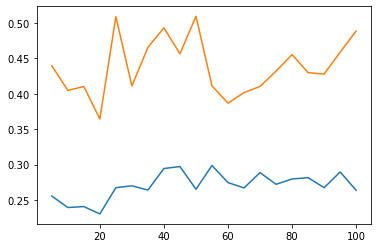

In [30]:
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=i)
    vector = model.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()    

### n-gram

In [31]:
from gensim.models import phrases

In [32]:
bigrams = phrases.Phrases(txt_df['description_token'], threshold=10.0)
model2 = Word2Vec(bigrams[txt_df['description_token']], vector_size = 300)
model2.train(txt_df['description_token'], total_examples=model2.corpus_count, epochs=model2.epochs)

(181910, 261245)

In [33]:
vector2 = model2.wv
vector2.most_similar('computer')

[('vacuum', 0.9991961121559143),
 ('requirement', 0.998254120349884),
 ('mobile', 0.9981440901756287),
 ('adaptor', 0.9978423118591309),
 ('device', 0.9976406097412109),
 ('tablet', 0.99737548828125),
 ('vgncrgl', 0.9973549246788025),
 ('connect', 0.9972419738769531),
 ('plug', 0.9971665740013123),
 ('panel', 0.9971584677696228)]

In [34]:
temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
temp = pd.DataFrame(temp.tolist())
clus.fit(temp)
clus1.fit(temp)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.23805570548450078 for categorie 0 and 0.18655743427747112 for categorie 1.


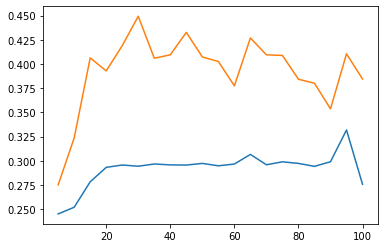

In [35]:
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model2.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector2 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()   

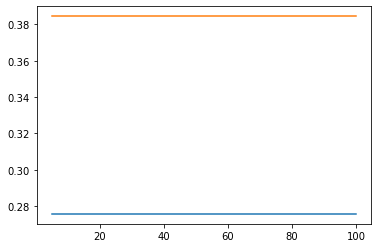

In [36]:
# test with skipgram instead of cbow
model3 = Word2Vec(vector_size = 300,sg =1)
model3.build_vocab(txt_df['description_token'].tolist())
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model3.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector3 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector3, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()

In [37]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

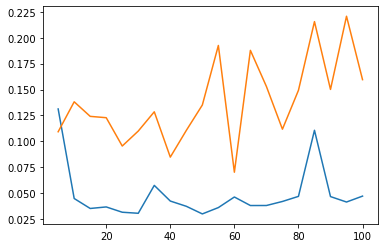

In [38]:

tagged_txt = [TaggedDocument(d, [i]) for i, d in enumerate(txt_df['description_token'].tolist())]
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model4 = Doc2Vec(tagged_txt, epochs = i, vector_size = 300)
    temp = txt_df['description_token'].apply(lambda x: model4.infer_vector(x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()   

## BERT

In [39]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [40]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [41]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import transformers 
from transformers import *

C:\Users\Nico\AppData\Roaming\Python\Python39\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [68]:
# Hugging Face
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
     
    return features_bert, last_hidden_states_tot

In [66]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = txt_df['description_clean'].tolist()

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

loading weights file tf_model.h5 from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\tf_model.h5
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further 

In [69]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

1/1 [==============================] - 0s 495ms/step


In [73]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.18740335662860017 for categorie 0 and 0.3155946093761607 for categorie 1.


In [74]:
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [75]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

loading configuration file config.json from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Nico/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

In [76]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.18757241694004664 for categorie 0 and 0.30222679982991446 for categorie 1.


In [77]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [80]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    return features

In [81]:
batch_size = 10
features_USE = feature_USE_fct(sentences, batch_size)

In [82]:
clus.fit(features_USE)
clus1.fit(features_USE)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.27954797519569174 for categorie 0 and 0.29499285214684035 for categorie 1.
